In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory Analysis of New York Crime Data
---

In [4]:
df = pd.read_csv('complaints_2018_final.csv')

In [18]:
df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [19]:
df['dayofweek'] = df.cmplnt_fr_dt.apply(lambda x: x.day_name())
df['month'] = df.cmplnt_fr_dt.apply(lambda x: x.month)

In [5]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,4438.0,1.158795e+07,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,77354.0,4.355518e+07,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,97932.0,6.933617e+07,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179


In [6]:
df.isnull().sum()
df.dtypes

cmplnt_num                       int64
cmplnt_fr_dt                    object
cmplnt_fr_tm                    object
rpt_dt                          object
ky_cd                            int64
ofns_desc                       object
pd_cd                            int64
pd_desc                         object
law_cat_cd                      object
boro_nm                         object
prem_typ_desc                   object
susp_age_group                  object
susp_race                       object
susp_sex                        object
latitude                       float64
longitude                      float64
patrol_boro                     object
vic_age_group                   object
vic_race                        object
vic_sex                         object
population                     float64
area                           float64
county                          object
zipcodes                       float64
adjusted_gross_income_(agi)    float64
avg_agi                  

In [8]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,Friday,12
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,Wednesday,10
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,Monday,12
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,Monday,9
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,Tuesday,9


In [13]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

In [22]:
df.month.nunique()

12

In [20]:
#What I plan to dummy later, since they are object type data
morons = ['ofns_desc','pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex','patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes','dayofweek']

In [23]:
X = df.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
X = pd.get_dummies(X, columns = morons, drop_first = True)

In [26]:
X.shape
sc = StandardScaler()
Z = sc.fit_transform(X)

In [41]:
def elbow(Z, low = 2, high = 8):
    things = []
    for clusters in range(low, high):
        kmeans = KMeans(n_clusters=clusters,
                        random_state=42)
        kmeans.fit(Z)
        things.append(kmeans.inertia_)

    plt.plot(list(range(low, high)), things, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distance from Centroid')

In [30]:
%%time
km = KMeans(n_clusters = 3)
km.fit(Z)

CPU times: user 43min 50s, sys: 2h 1min 55s, total: 2h 45min 46s
Wall time: 5h 20min 27s


KMeans(n_clusters=3)

This data is simply too large to analyze under time contraints. I will have to settle for sampling a small subset of the data.

## Subset Analysis
---

In [48]:
sample = df.sample(frac = .20)

In [49]:
X = sample.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
X = pd.get_dummies(X, columns = morons, drop_first = True)

Z = sc.fit_transform(X)

CPU times: user 10min 30s, sys: 40.8 s, total: 11min 11s
Wall time: 3min 6s


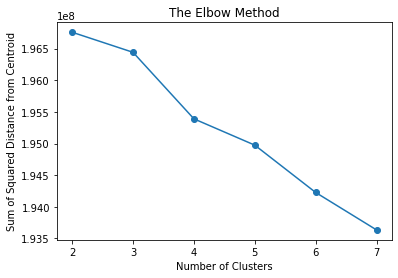

In [50]:
%%time
elbow(Z)

CPU times: user 13min 5s, sys: 28.6 s, total: 13min 34s
Wall time: 3min 20s


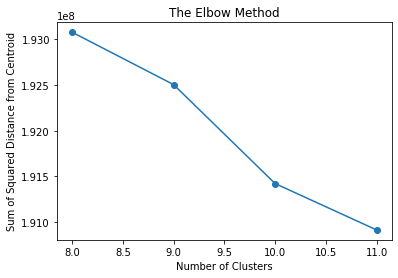

In [52]:
%%time
elbow(Z, low = 8, high = 12)

It looks like there's not one good option to use here. I'll try 4 and 5.

In [51]:
%%time
km = KMeans(n_clusters = 4)
km.fit(Z)

CPU times: user 1min 34s, sys: 6.31 s, total: 1min 40s
Wall time: 29.1 s


KMeans(n_clusters=4)

In [53]:
silhouette_score(Z, km.labels_)

0.0055640868596016696

In [54]:
km = KMeans(n_clusters = 5)
km.fit(Z)

KMeans(n_clusters=5)

In [56]:
silhouette_score(Z, km.labels_)

0.005407955459575741

It is beginning to appear that this analyis will simply be confirmation that this data has very little correlations to be found within it, which would explain the relatively poor performance of modelling in other notebooks.

## DBSCAN attempt
---

In [ ]:
db = DBSCAN(eps = .2, min_samples = 5)

db.fit(Z)